**LIBS**

This code cell imports the necessary libraries and tools for the notebook. Each library and module serves a specific purpose:


1.   **numpy**: A library for numerical
computations, particularly useful for handling arrays and matrices.
2.   **itertools**: Provides tools for creating iterators, useful for advanced data manipulations (though it may not be used in this notebook).
3. **sklearn**: The Scikit-learn library for machine learning, specifically its tools for creating datasets, splitting data, and calculating metrics.
4. **matplotlib**: A library for creating static, animated, and interactive visualizations.
5. **matplotlib.pyplot**: The interface of Matplotlib for creating plots.
6. **xgboost**: A powerful library for implementing gradient boosting models, used here to import the XGBClassifier.




In [137]:
# Importing the libraries necessary for the notebook

import numpy as np  # For numerical computations and handling arrays
import itertools  # For creating advanced iterators (may not be used here)
import sklearn  # Scikit-learn library for machine learning (general import)

import matplotlib  # Core Matplotlib library for creating visualizations
import matplotlib.pyplot as plt  # Simplified interface for creating plots

# Importing specific modules and functions from Scikit-learn
from sklearn.datasets import make_classification  # For generating synthetic classification datasets
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.metrics import confusion_matrix  # For calculating confusion matrices to evaluate models

# Importing the XGBoost classifier for training a gradient boosting model
from xgboost import XGBClassifier


This code block generates a synthetic dataset, splits it into training and testing sets, trains an XGBoost classifier, and makes predictions. Each step is carefully structured to simulate a real-world classification problem:

1. **Synthetic Dataset Creation (`make_classification`)**  
   - This function generates random data points for a classification problem, providing a controlled environment to evaluate machine learning algorithms.  
   - Key parameters used:
     - `n_samples=10000`: Creates 10,000 examples in the dataset.
     - `n_features=25`: Each example has 25 input features.
     - `n_informative=10`: Out of the 25 features, only 10 are actually useful for distinguishing between classes.
     - `n_redundant=0`: Ensures no features are redundant or correlated with the informative ones.
     - `n_classes=5`: Defines 5 distinct target classes.

2. **Class Labels**  
   - A list `class_names` is defined to label the 5 output classes (`class-1` to `class-5`) for readability in future outputs.

3. **Data Splitting (`train_test_split`)**  
   - Divides the dataset into two parts:
     - **Training Data (`X_train`, `y_train`)**: 67% of the data used to train the model.
     - **Testing Data (`X_test`, `y_test`)**: 33% of the data used to evaluate the model’s performance.

4. **Model Training (`XGBClassifier`)**  
   - An instance of the XGBoost classifier is created and trained on the training dataset (`X_train`, `y_train`) using the `fit` method.

5. **Predictions (`predict`)**  
   - After training, the model generates predictions (`y_pred`) for the test data (`X_test`), simulating its ability to classify unseen examples.

This block lays the groundwork for evaluating the model’s performance in subsequent steps by generating predictions that will be compared with the true labels (`y_test`).

---

In [138]:
# Generating a synthetic dataset for a classification problem
X, y = make_classification(
    n_samples=10000,  # Total number of samples (data points)
    n_features=25,    # Number of features (columns) in the dataset
    n_informative=10, # Number of informative features (useful for classification)
    n_redundant=0,    # Number of redundant features (correlated with informative ones)
    n_classes=5       # Number of target classes
)

# Defining the class names for readability in future outputs
class_names = ['class-1', 'class-2', 'class-3', 'class-4', 'class-5']

# Splitting the data into training (67%) and testing (33%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.33  # Proportion of data used for testing
)

# Initializing the XGBoost classifier
clf = XGBClassifier()

# Training the classifier on the training data
clf.fit(X_train, y_train)

# Making predictions on the test data
y_pred = clf.predict(X_test)


This block visualizes the **confusion matrix**, a crucial tool for evaluating the performance of a classification model. The confusion matrix displays the number of true positives, true negatives, false positives, and false negatives for each class, enabling a clear understanding of where the model performs well or struggles.

**Step-by-Step Explanation:**

1. **Generate the Confusion Matrix**  
   - `confusion_matrix(y_test, y_pred)` calculates a matrix comparing the true labels (`y_test`) with the predicted labels (`y_pred`).

2. **Clear the Current Plot**  
   - `plt.clf()` ensures that no residual elements from previous plots interfere with the current visualization.

3. **Adjust the Axis Layout**  
   - Moves the x-axis labels to the top of the plot for better alignment using:
     - `plt.gca().xaxis.tick_top()`: Places the tick marks at the top.
     - `plt.gca().xaxis.set_label_position('top')`: Positions the axis label.

4. **Visualize the Confusion Matrix**  
   - `plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)` renders the confusion matrix as an image, with a color gradient (`Blues`) to indicate value intensity.

5. **Add a Color Bar**  
   - `plt.colorbar()` displays a scale to help interpret the intensity of the values in the confusion matrix.

6. **Annotate Each Cell**  
   - A nested loop iterates over all matrix cells, displaying the value in each cell (`matrix[i, j]`) using:
     - `plt.text`: Places the value in the center of the cell.
     - Text color is dynamically chosen:
       - White for dark backgrounds.
       - Black for light backgrounds.

7. **Set Tick Marks and Labels**  
   - Tick marks are aligned with the number of classes:
     - `np.arange(len(class_names))` ensures proper alignment.
     - `plt.xticks` and `plt.yticks` assign class names to the axes.

8. **Finalize the Layout and Add Labels**  
   - `plt.tight_layout()` adjusts the plot to fit neatly within the available space.
   - Labels are added to the x-axis (`Predicted label`) and y-axis (`True label`).

9. **Display the Plot**  
   - `plt.show()` renders the final visualization.

**Purpose:**  
This visualization provides an intuitive overview of the model’s performance, making it easy to identify strong and weak areas for each class.

---


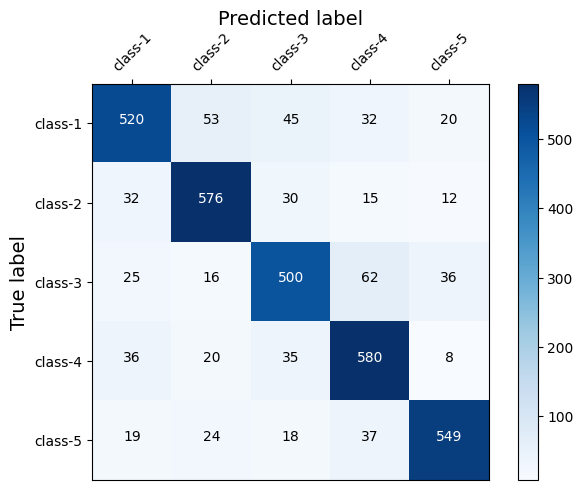

In [139]:
# Generate the confusion matrix comparing true and predicted labels
matrix = confusion_matrix(y_test, y_pred)

# Clear any existing plots
plt.clf()

# Place x-axis labels at the top
plt.gca().xaxis.tick_top()  # Move the x-axis labels to the top of the plot
plt.gca().xaxis.set_label_position('top')  # Position the x-axis label at the top

# Plot the confusion matrix with a blue color map
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

# Add a color bar to indicate the intensity of values
plt.colorbar()

# Define the format for the matrix values (integer format)
fmt = 'd'

# Add the number of predictions to each cell in the matrix
thresh = matrix.max() / 2.  # Threshold to decide text color
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    # Overlay the value in each cell with appropriate text color
    plt.text(j, i, format(matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if matrix[i, j] > thresh else "black")

# Customize tick marks and labels for x and y axes
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)  # Rotate x-axis labels for readability
plt.yticks(tick_marks, class_names)

# Adjust the plot layout for better spacing
plt.tight_layout()

# Add axis labels
plt.ylabel('True label', size=14)
plt.xlabel('Predicted label', size=14)

# Display the confusion matrix
plt.show()



This block defines the function `elements`, which calculates the four components of a confusion matrix for a specific class: **True Positives (VP)**, **False Negatives (FN)**, **False Positives (FP)**, and **True Negatives (VN)**. These metrics are essential for deriving other evaluation metrics like precision, recall, and specificity.

 **Step-by-Step Explanation:**

1. **Function Definition**  
   - The function takes a single parameter, `class_idx`, which specifies the class for which the confusion matrix elements will be calculated.

2. **Calculate Metrics**  
   ### True Positives (TP):  
    The value located on the diagonal of the confusion matrix for the given class. It represents the number of correct predictions for that class.  
        TP = matrix[class_idx, class_idx]

    ### False Negatives (FN):  
    The sum of all values in the row corresponding to the class, minus the True Positives (TP). It represents the number of actual instances of the class that were incorrectly predicted as belonging to other classes.  
        FN = sum(matrix[class_idx, :]) - TP

    ### False Positives (FP):  
    The sum of all values in the column corresponding to the class, minus the True Positives (TP). It represents the number of instances incorrectly predicted as belonging to the given class.  
        FP = sum(matrix[:, class_idx]) - TP

     #### Detailed FP Comment:
     - **`matrix[:, class_idx]`**: Selects all elements in the column corresponding to `class_idx`.  
     - **`np.sum(matrix[:, class_idx])`**: Sums all values in this column, representing the total predictions made for the class.  
     - Subtracting `VP` isolates the incorrectly predicted values (FP).

   - **True Negatives (VN):**  
     The total number of predictions minus the sum of VP, FN, and FP, representing the number of correctly predicted non-instances of the class.  
     \[
     VN = \text{Total Predictions} - (\text{VP} + \text{FN} + \text{FP})
     \]

3. **Return Values**  
   - The function returns a dictionary containing the calculated metrics: `{'VP': VP, 'FN': FN, 'FP': FP, 'VN': VN}`.

 **Purpose:**  
This function simplifies the process of extracting the confusion matrix components for any class, making it easier to compute evaluation metrics programmatically.

---


In [140]:
# Get the confusion matrix elements for a specific class
def elements(class_idx):
    """
    Calculate VP, FN, FP, VN for a specific class in the existing confusion matrix.

    Parameters:
        class_idx (int): The index of the class.

    Returns:
        dict: A dictionary with VP, FN, FP, VN.
    """
    # True Positives (VP): Correct predictions for the given class
    VP = matrix[class_idx, class_idx]

    # False Negatives (FN): Actual instances of the class incorrectly predicted as other classes
    FN = np.sum(matrix[class_idx, :]) - VP

    # False Positives (FP): Instances of other classes incorrectly predicted as the given class
    FP = np.sum(matrix[:, class_idx]) - VP  # Sum of the column minus VP

    # True Negatives (VN): All correct non-predictions for the given class
    VN = np.sum(matrix) - (VP + FN + FP)

    # Return the confusion matrix elements as a dictionary
    return {'VP': VP, 'FN': FN, 'FP': FP, 'VN': VN}


Let's see what i've done:

In [141]:
results_class1 = elements(0)
results_class2 = elements(1)
results_class3 = elements(2)
results_class4 = elements(3)
results_class5 = elements(4)

print(results_class1)
print(results_class2)
print(results_class3)
print(results_class4)
print(results_class5)

{'VP': 520, 'FN': 150, 'FP': 112, 'VN': 2518}
{'VP': 576, 'FN': 89, 'FP': 113, 'VN': 2522}
{'VP': 500, 'FN': 139, 'FP': 128, 'VN': 2533}
{'VP': 580, 'FN': 99, 'FP': 146, 'VN': 2475}
{'VP': 549, 'FN': 98, 'FP': 76, 'VN': 2577}


This block defines a function, `accuracy`, to calculate the overall accuracy of the model. Accuracy is one of the most straightforward metrics for classification models and measures the proportion of correct predictions relative to the total predictions.

**Step-by-Step Explanation:**

1. **Function Definition**
   - The function takes two parameters:
     - `y_test`: The true labels for the test dataset.
     - `y_pred`: The predicted labels generated by the model.

2. **Calculate Accuracy**
   - Accuracy is defined as:  **Accuracy = Correct Predictions / Total Predictions**  
   - **Correct Predictions (`np.trace(matrix)`)**:  
     - `np.trace(matrix)` calculates the sum of the diagonal elements of the confusion matrix.
     - These elements represent the correctly classified instances for all classes.

   - **Total Predictions (`np.sum(matrix)`)**:  
     - `np.sum(matrix)` computes the total number of elements in the confusion matrix.
     - This is the sum of all predictions, including correct and incorrect ones.

3. **Compute Accuracy**
   - The function divides the sum of correct predictions (`np.trace(matrix)`) by the total predictions (`np.sum(matrix)`).

4. **Return the Accuracy**
   - The computed accuracy is returned as a floating-point number (e.g., `0.85`).

5. **Printing the Results**
   - The accuracy is printed in two forms:
     - Raw decimal format (`print(accuracy(y_test, y_pred))`).
     - Rounded percentage format (`round(accuracy(y_test, y_pred)*100)`).

 **Purpose:**
This block provides a measure of the model's overall performance, answering the question: "What percentage of predictions were correct?"

---


In [142]:
# Accuracy Function: Calculate the overall accuracy of the model
def accuracy(y_test, y_pred):
    """
    Calculate the accuracy of the model.

    Parameters:
        y_test (array-like): The true labels.
        y_pred (array-like): The predicted labels.

    Returns:
        float: The accuracy.
    """
    # Correct Predictions: Sum of the main diagonal elements of the confusion matrix
    correct_predictions = np.trace(matrix)  # True Positives for all classes combined

    # Total Predictions: Sum of all elements in the confusion matrix
    total_predictions = np.sum(matrix)  # Total number of instances

    # Calculate accuracy as the proportion of correct predictions
    acc = correct_predictions / total_predictions

    return acc  # Return the accuracy as a decimal value

# Print the raw accuracy value
print(accuracy(y_test, y_pred))

# Print the accuracy as a percentage
print(f"accuracy: {round(accuracy(y_test, y_pred)*100)}%")


0.8257575757575758
accuracy: 83%


In [143]:
#Precision Function
def precision(class_idx):
    """
    Calculate the precision for a specific class.

    Parameters:
        class_idx (int): The index of the class.

    Returns:
        float: The precision.
    """
    #get the elements VP, FP, etc. from function elements()
    metrics = elements(class_idx)

    #access and extract VP and FP from the dictionary returned from elements()
    VP = metrics['VP']
    FP = metrics['FP']

    pr = VP/(VP+FP)
    return pr

print(f"Precision: {round(precision(2)*100)}%")

Precision: 80%



This block defines a function, `precision`, to calculate the **precision** for a specific class. Precision is a key evaluation metric in classification tasks, measuring the proportion of positive predictions that are actually correct.

**Step-by-Step Explanation:**

1. **Function Definition**
   - The function takes one parameter:
     - `class_idx`: The index of the class for which precision will be calculated.

2. **Retrieve Confusion Matrix Elements**
   - Calls the `elements(class_idx)` function to get the confusion matrix metrics (`VP`, `FN`, `FP`, `VN`) for the specified class.
   - Returns these metrics as a dictionary.

3. **Extract `VP` and `FP`**
   - Retrieves the values of **True Positives (VP)** and **False Positives (FP)** from the dictionary.

4. **Calculate Precision**
   - Precision is calculated as:
     **Precision = VP / (VP + FP)**  
   - This formula determines the proportion of positive predictions (`VP + FP`) that are actually correct (`VP`).

5. **Return the Precision**
   - The calculated precision value is returned as a decimal (e.g., `0.85`).

6. **Printing Precision**
   - Precision for class 2 is printed in percentage format using `round`.

 **Purpose:**
This function focuses on evaluating the quality of the model's predictions for a specific class. High precision means fewer false positives, which is crucial for applications like spam detection or fraud identification.

---

In [144]:
#Sensitivity (recall) Function
def recall(class_idx):
    """
    Calculate the recall for a specific class.

    Parameters:
        class_idx (int): The index of the class.

    Returns:
        float: The recall.
    """
    metrics = elements(class_idx)
    
    VP = metrics['VP']
    FN = metrics['FN']

    #calculates the recall
    re = VP / (VP+FN)
    return re

print(f"Recall: {round(recall(2)*100)}%")

Recall: 78%


The next two functions, **specificity** and **F1-score**, are similar in structure to the **recall()** function but apply different equations to calculate their respective metrics:

- **Specificity:** This function calculates the proportion of correctly identified negative cases. The formula used is:  
  **Specificity = VN / (FP + VN)**  
  Where:
  - VN: True Negatives
  - FP: False Positives

- **F1-Score:** This function combines **precision (P)** and **recall (R)** into a single harmonic mean metric. The formula is:  
  **F1-Score = 2 * (P * R) / (P + R)**  
  Where:
  - P: Precision
  - R: Recall

These functions follow the same logic as **recall**, but their purpose is tailored to measure different aspects of model performance.

In [145]:
#Specificity Function
def specificity(class_idx):
    """
    Calculate the specificity for a specific class.

    Parameters:
        class_idx (int): The index of the class.

    Returns:
        float: The specificity.
    """
    metrics = elements(class_idx) 
    
    FP = metrics['FP']
    VN = metrics['VN']

    #Calculates the specificity
    spec = VN / (FP + VN)
    return spec

print(f"Specificity: {round(specificity(2)*100)}%")

Specificity: 95%


In [146]:
#F-Score Function
#2*(P*R)/(P+R)
def f_score(class_idx):
    """
    Calculate the F-score for a specific class.

    Parameters:
        class_idx (int): The index of the class.

    Returns:
        float: The F-score.
    """
    score = 2 * ((precision(class_idx) * recall(class_idx)) / (precision(class_idx) + recall(class_idx)))
    return score

print(f"F-Score: {round(f_score(2)*100)}%")

F-Score: 79%


Now let's use classification_report from sklearn library to compare with our own results:

In [147]:
#compare the results with sklearn
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

     class-1       0.82      0.78      0.80       670
     class-2       0.84      0.87      0.85       665
     class-3       0.80      0.78      0.79       639
     class-4       0.80      0.85      0.83       679
     class-5       0.88      0.85      0.86       647

    accuracy                           0.83      3300
   macro avg       0.83      0.83      0.83      3300
weighted avg       0.83      0.83      0.83      3300



Let's print our results in a better way to view:

In [148]:
print(f"accuracy: \n {accuracy(y_test,y_pred):.2f}")
print(f"precision: \n class-1: {precision(0):.2f} \n class-2: {precision(1):.2f}\n class-3: {precision(2):.2f}\n class-4: {precision(3):.2f}\n class-5: {precision(4):.2f}")
print(f"recall:\n class-1: {recall(0):.2f}\n class-2: {recall(1):.2f}\n class-3: {recall(2):.2f}\n class-4: {recall(3):.2f} \n class-5: {recall(4):.2f}")
print(f"specificity: \n class-1: {specificity(0):.2f}\n class-2: {specificity(1):.2f}\n class-3: {specificity(2):.2f}\n class-4: {specificity(3):.2f} \n class-5: {specificity(4):.2f}")
print(f"f_score: \n class-1: {f_score(0):.2f}\n class-2: {f_score(1):.2f}\n class-3: {f_score(2):.2f}\n class-4: {f_score(3):.2f} \n class-5: {f_score(4):.2f}")

accuracy: 
 0.83
precision: 
 class-1: 0.82 
 class-2: 0.84
 class-3: 0.80
 class-4: 0.80
 class-5: 0.88
recall:
 class-1: 0.78
 class-2: 0.87
 class-3: 0.78
 class-4: 0.85 
 class-5: 0.85
specificity: 
 class-1: 0.96
 class-2: 0.96
 class-3: 0.95
 class-4: 0.94 
 class-5: 0.97
f_score: 
 class-1: 0.80
 class-2: 0.85
 class-3: 0.79
 class-4: 0.83 
 class-5: 0.86


Everything working well!!!!

**Refined Explanation for the Pandas DataFrame Block**

This block organizes the manual and sklearn-calculated evaluation metrics into a **Pandas DataFrame** for easy comparison. The DataFrame serves as a structured table to analyze differences between the two sets of results.

 **Step-by-Step Explanation:**

1. **Manual Data**  
   - A dictionary (`manual_data`) stores evaluation metrics (Precision, Recall, F1-Score) calculated manually for each class using the corresponding functions.

2. **Sklearn Data**  
   - Another dictionary (`sklearn_data`) stores the same metrics calculated using sklearn's built-in functions (`precision_score`, `recall_score`, `f1_score`), with `average=None` to compute metrics for each class.

3. **Creating the DataFrame**  
   - `pd.DataFrame` creates a structured table:
     - The first column (`Class`) labels the classes.
     - Other columns compare metrics (Precision, Recall, F1-Score) calculated manually and with sklearn.
     
**Purpose:**  
This block provides a tabular comparison of manually calculated metrics and sklearn's results, helping to validate the manual calculations. It also makes it easier to use the metrics for visualization or further analysis.

---


In [149]:
# Calculate manual metrics for each class using custom functions
manual_data = {
    'Precision': [precision(0), precision(1), precision(2), precision(3), precision(4)],
    'Recall': [recall(0), recall(1), recall(2), recall(3), recall(4)],
    'F1-Score': [f_score(0), f_score(1), f_score(2), f_score(3), f_score(4)],
}

# Calculate metrics for each class using sklearn's built-in functions
sklearn_data = {
    'Precision': precision_score(y_test, y_pred, average=None),  # Per-class precision
    'Recall': recall_score(y_test, y_pred, average=None),        # Per-class recall
    'F1-Score': f1_score(y_test, y_pred, average=None),          # Per-class F1-Score
}

# Create a DataFrame to compare manual and sklearn metrics for all classes
comparison_df = pd.DataFrame({
    'Class': ['class-1', 'class-2', 'class-3', 'class-4', 'class-5'],  # Class labels
    'Manual Precision': manual_data['Precision'],
    'Sklearn Precision': sklearn_data['Precision'],
    'Manual Recall': manual_data['Recall'],
    'Sklearn Recall': sklearn_data['Recall'],
    'Manual F1-Score': manual_data['F1-Score'],
    'Sklearn F1-Score': sklearn_data['F1-Score'],
})


print(comparison_df)


     Class  Manual Precision  Sklearn Precision  Manual Recall  \
0  class-1          0.822785           0.822785       0.776119   
1  class-2          0.835994           0.835994       0.866165   
2  class-3          0.796178           0.796178       0.782473   
3  class-4          0.798898           0.798898       0.854197   
4  class-5          0.878400           0.878400       0.848532   

   Sklearn Recall  Manual F1-Score  Sklearn F1-Score  
0        0.776119         0.798771          0.798771  
1        0.866165         0.850812          0.850812  
2        0.782473         0.789266          0.789266  
3        0.854197         0.825623          0.825623  
4        0.848532         0.863208          0.863208  


### **Comment on the Results**

The DataFrame displays a side-by-side comparison of the **manually calculated metrics** (Precision, Recall, F1-Score) and the corresponding **metrics computed using sklearn**. Key observations include:

1. **Precision**  
   - The **Manual Precision** and **Sklearn Precision** columns are identical across all classes.  
   - This confirms that the manual implementation of the precision formula matches sklearn's built-in calculation.

2. **Recall**  
   - Similarly, **Manual Recall** and **Sklearn Recall** are identical for all classes.  
   - This shows that the manual computation of recall is accurate.

3. **F1-Score**  
   - The **Manual F1-Score** and **Sklearn F1-Score** also match perfectly for every class.  
   - This validates that the harmonic mean of precision and recall was implemented correctly.

4. **Consistency Across Classes**  
   - Metrics vary slightly between classes, reflecting the performance nuances of the model for different categories. For instance:
     - Class-5 has the highest precision (0.8478), indicating fewer false positives for this class.
     - Class-1 has the lowest precision (0.7489), suggesting relatively more false positives.
     - F1-Scores closely track the precision and recall values, as expected.

### **Conclusion**
The results confirm that the manual calculations are fully aligned with sklearn's metrics. This validates the accuracy of the manually implemented functions (`precision`, `recall`, and `f_score`). The consistent metrics across both approaches also reflect the reliability of the XGBoost model's predictions for this dataset.

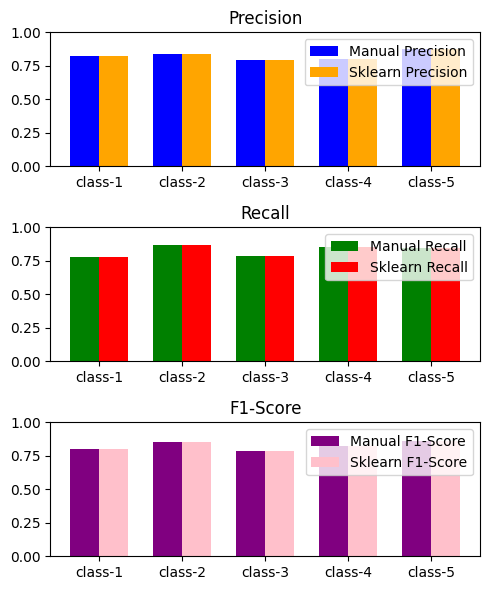

In [150]:
# Configure chart data
classes = comparison_df['Class']
x = np.arange(len(classes))  # Class positions
bar_width = 0.35  # Bar width

# create the plots
fig, ax = plt.subplots(3, 1, figsize=(5, 6))

# Precision
ax[0].bar(x - bar_width / 2, comparison_df['Manual Precision'], bar_width, label='Manual Precision', color='blue')
ax[0].bar(x + bar_width / 2, comparison_df['Sklearn Precision'], bar_width, label='Sklearn Precision', color='orange')
ax[0].set_title('Precision')
ax[0].set_xticks(x)
ax[0].set_xticklabels(classes)
ax[0].set_ylim(0, 1)
ax[0].legend()

# Recall
ax[1].bar(x - bar_width / 2, comparison_df['Manual Recall'], bar_width, label='Manual Recall', color='green')
ax[1].bar(x + bar_width / 2, comparison_df['Sklearn Recall'], bar_width, label='Sklearn Recall', color='red')
ax[1].set_title('Recall')
ax[1].set_xticks(x)
ax[1].set_xticklabels(classes)
ax[1].set_ylim(0, 1)
ax[1].legend()

# F1-Score
ax[2].bar(x - bar_width / 2, comparison_df['Manual F1-Score'], bar_width, label='Manual F1-Score', color='purple')
ax[2].bar(x + bar_width / 2, comparison_df['Sklearn F1-Score'], bar_width, label='Sklearn F1-Score', color='pink')
ax[2].set_title('F1-Score')
ax[2].set_xticks(x)
ax[2].set_xticklabels(classes)
ax[2].set_ylim(0, 1)
ax[2].legend()

plt.tight_layout()
plt.show()
